In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
plt.rcParams['figure.figsize'] = (20,10)


Objective: A team receives packages and stores them until the next truck arrives to transport the packages to their final destination. In order to plan how many people should work each day, the staff needs to know how many packages will arrive daily.
Currently, they plan for 2,000 packages per day. We will try to build a model that does it better.

In [2]:
original_df = pd.read_csv("data/incoming_packages.csv")
df = original_df.copy()

In [3]:
print(df.head(20))
print(df.shape)
print(df.tail(20))
print(df.value_counts())

          date  total_packages  cooled_packages  fire_packages  \
0   2020-01-01            1745              370            488   
1   2020-01-02            1847              308            402   
2   2020-01-03            1842              314            394   
3   2020-01-04             664              131            181   
4   2020-01-05             871              137            190   
5   2020-01-06            1744              367            410   
6   2020-01-07            1848              383            457   
7   2020-01-08            1711              279            388   
8   2020-01-09            1767              294            440   
9   2020-01-10            1717              298            353   
10  2020-01-11             593              109            155   
11  2020-01-12            1063              166            236   
12  2020-01-13            1868              333            389   
13  2020-01-14            1777              370            466   
14  2020-0

In [4]:
df = df[['date','total_packages']]

In [5]:
df['moving_10'] = df['total_packages'].rolling(10).mean()
df['moving_20'] = df['total_packages'].rolling(20).mean()
df['moving_50'] = df['total_packages'].rolling(50).mean()
df['moving_100'] = df['total_packages'].rolling(100).mean()


df['date'] = pd.to_datetime(df['date'])


# Data July and Aug
start_date = '2020-06-25'
end_date = '2020-08-10'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
july = pd.DataFrame(df.loc[mask])
july['date'] = pd.to_datetime(july['date'])

# Data November och December
start_date = '2020-11-01'
end_date = '2020-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
nov_dec = pd.DataFrame(df.loc[mask])
nov_dec['date'] = pd.to_datetime(nov_dec['date'])

nov_dec


,date,total_packages,moving_10,moving_20,moving_50,moving_100
305,2020-11-01,733,1500.1,1633.20,1600.30,1553.06
306,2020-11-02,2052,1505.1,1641.10,1622.50,1568.90
307,2020-11-03,2052,1623.3,1640.95,1623.90,1584.93
308,2020-11-04,2067,1755.8,1646.15,1627.02,1594.49
309,2020-11-05,1890,1749.8,1640.65,1624.40,1602.24
...,...,...,...,...,...,...
361,2020-12-27,3236,2285.5,2067.65,2050.50,1826.63
362,2020-12-28,3443,2438.2,2134.85,2102.10,1854.08
363,2020-12-29,3557,2701.8,2208.30,2134.10,1881.08
364,2020-12-30,3759,2989.6,2299.05,2170.76,1898.26


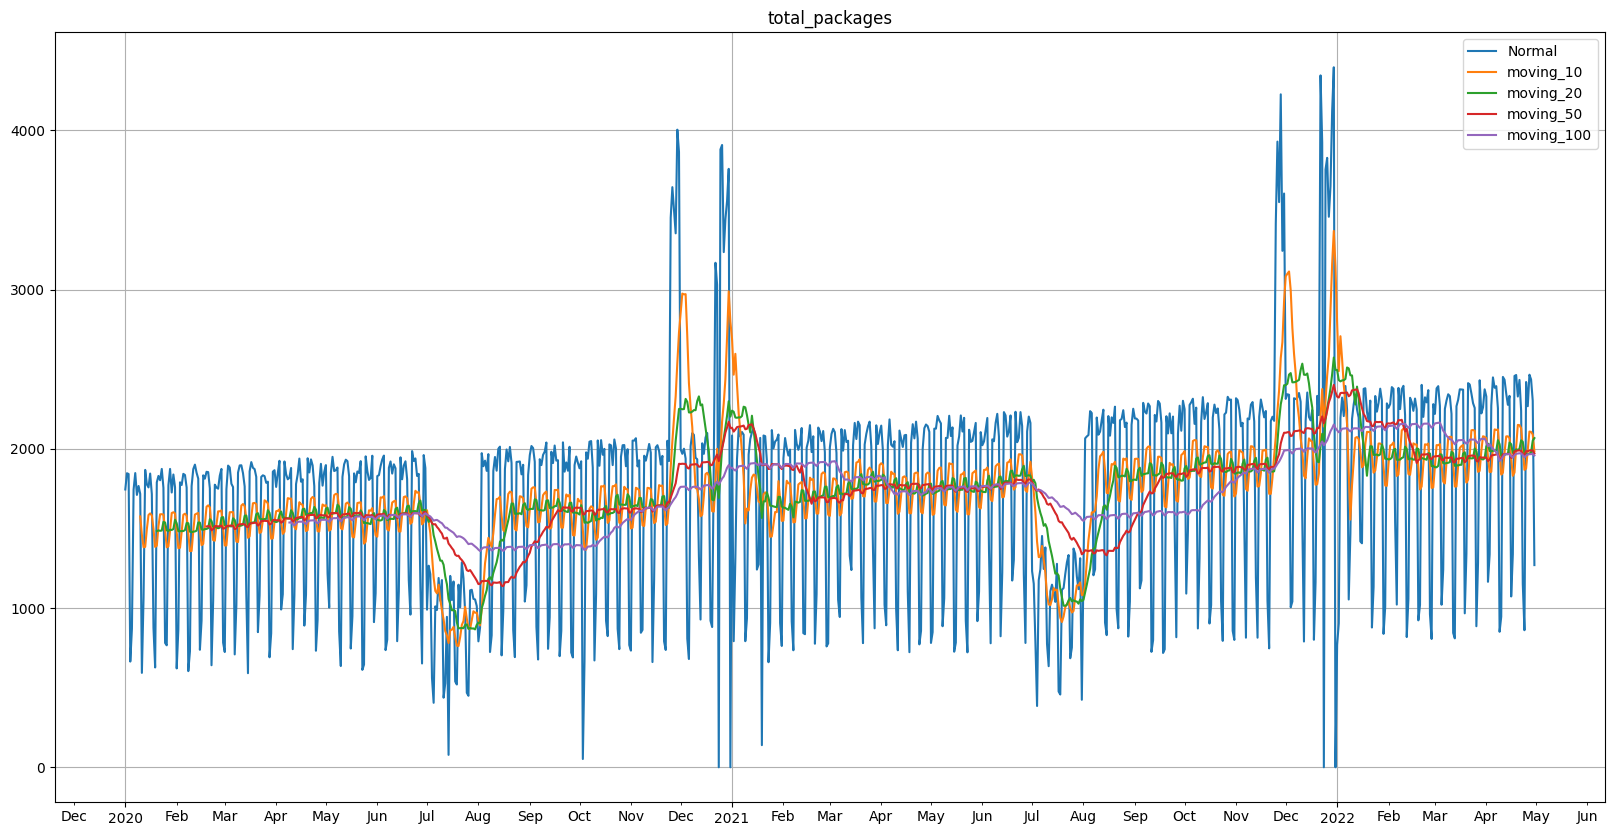

In [6]:
plt.plot(df['date'],df['total_packages'], label='Normal')
plt.plot(df['date'],df['moving_10'], label='moving_10')
plt.plot(df['date'],df['moving_20'], label='moving_20')
plt.plot(df['date'],df['moving_50'], label='moving_50')
plt.plot(df['date'],df['moving_100'], label='moving_100')

ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.title("total_packages")
plt.grid()
plt.legend(loc="upper right")
plt.show()

____
Closer look at july

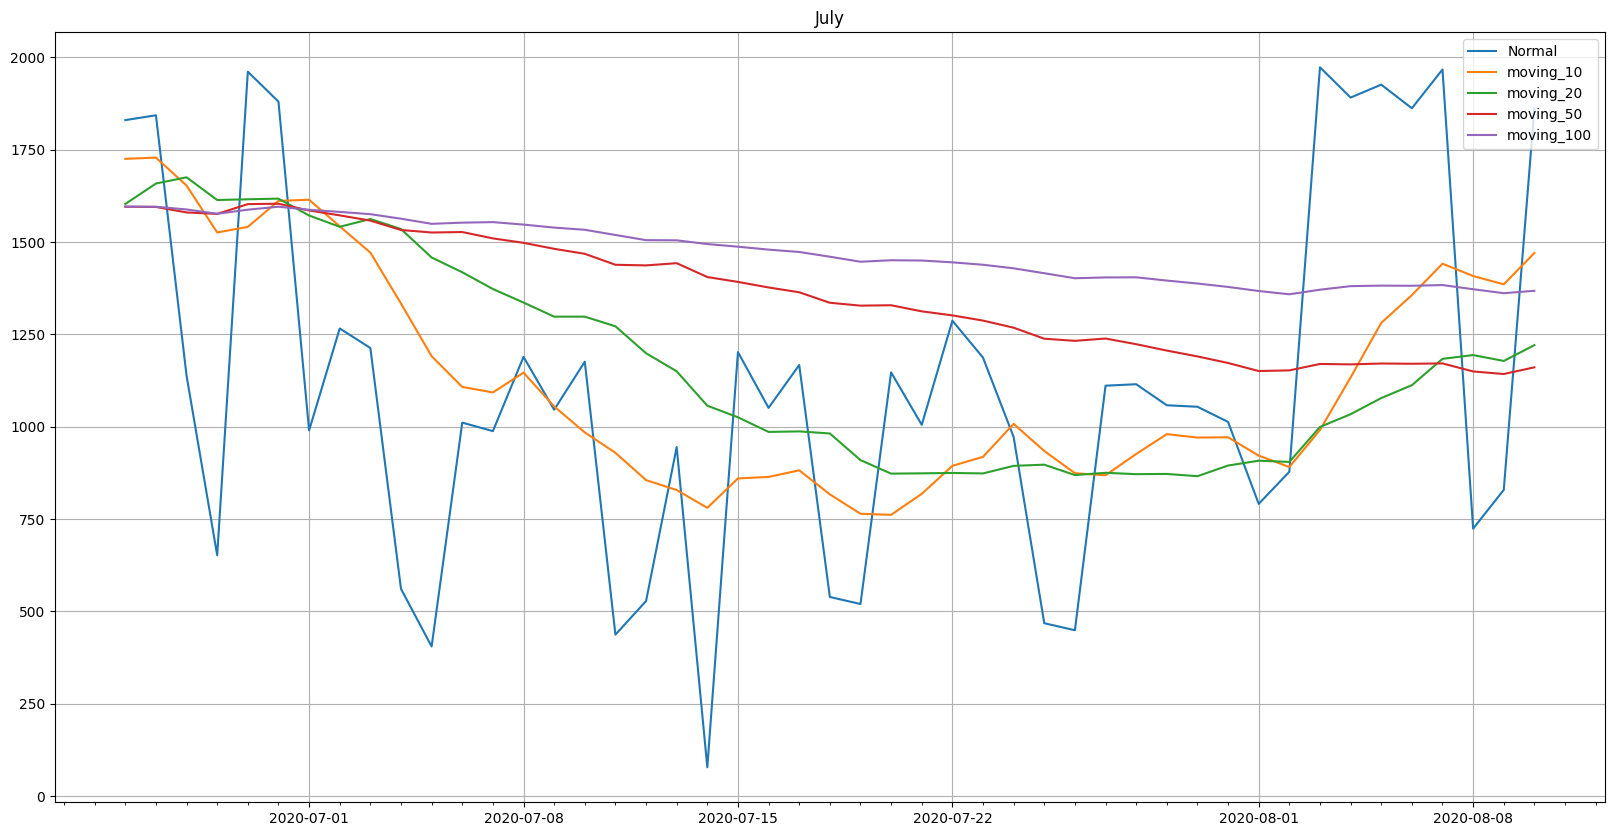

          date  total_packages  moving_10  moving_20  moving_50  moving_100
194 2020-07-13             945      828.6    1149.95    1442.66     1504.56
          date  total_packages  moving_10  moving_20  moving_50  moving_100
195 2020-07-14              78      780.3    1056.85    1405.16     1494.47
          date  total_packages  moving_10  moving_20  moving_50  moving_100
196 2020-07-15            1202      860.0    1025.45    1391.98     1487.28


In [7]:
plt.plot(july['date'],july['total_packages'], label='Normal')
plt.plot(july['date'],july['moving_10'], label='moving_10')
plt.plot(july['date'],july['moving_20'], label='moving_20')
plt.plot(july['date'],july['moving_50'], label='moving_50')
plt.plot(july['date'],july['moving_100'], label='moving_100')

ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.title("July")
plt.grid()
plt.legend(loc="upper right")
plt.show()
print(july[july["date"] == '2020-07-13'])
print(july[july["date"] == '2020-07-14'])
print(july[july["date"] == '2020-07-15'])

Here I can see that on the 13th of July, the number of packages drops drastically from 945 packages to 78 packages on the 14th of July, only to return to 1,202 packages on the 15th of July. I've searched for any holidays on that date, but there was nothing that seemed like a major holiday.

____
Closer look at November och December

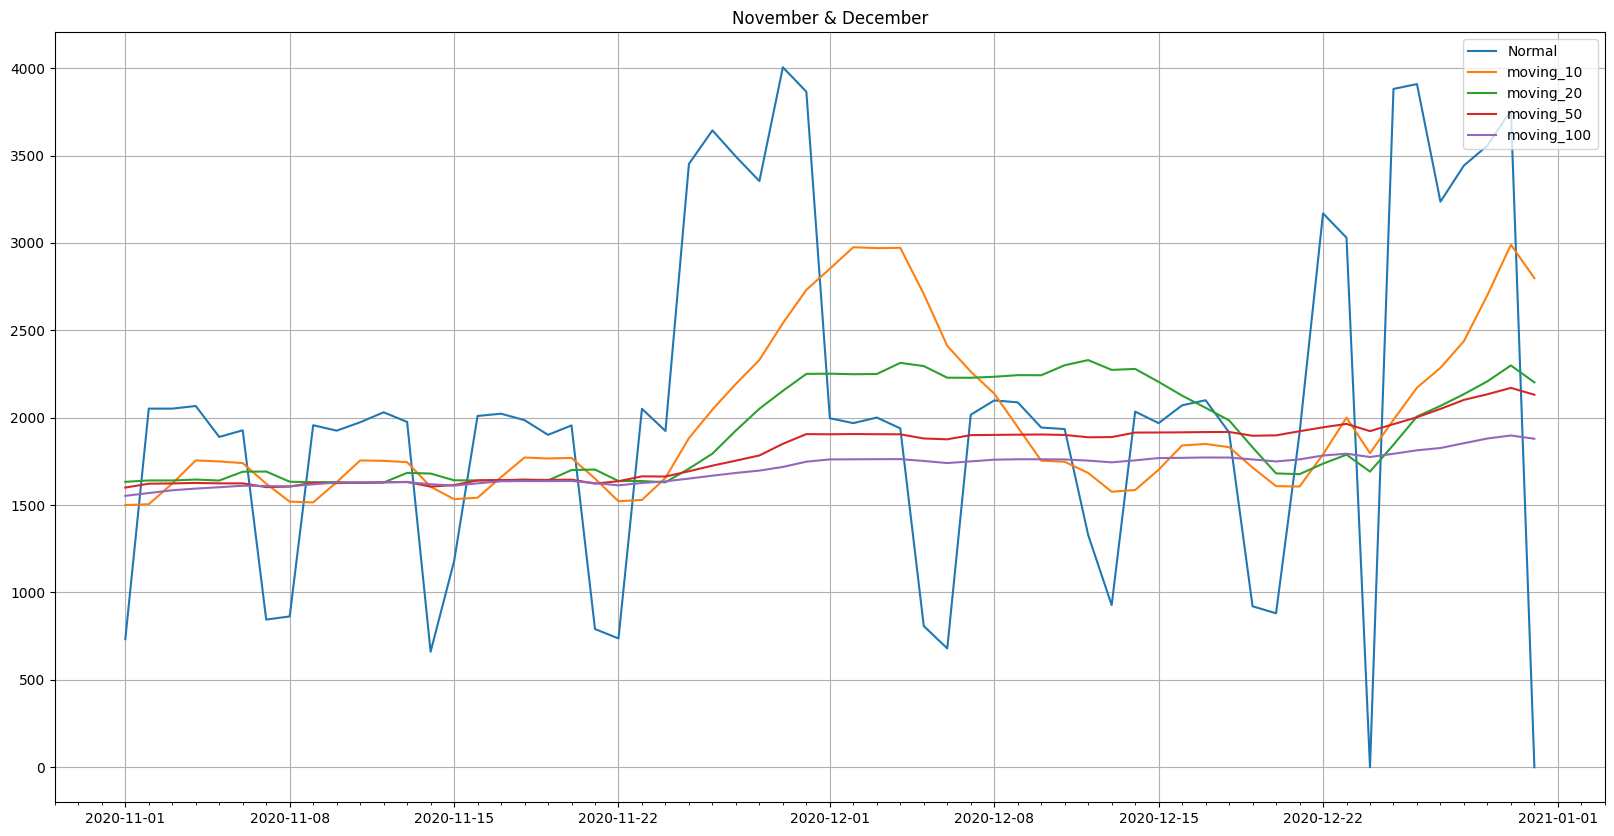

November
          date  total_packages  moving_10  moving_20  moving_50  moving_100
328 2020-11-24            1924     1655.9     1630.5    1663.42     1636.06
          date  total_packages  moving_10  moving_20  moving_50  moving_100
329 2020-11-25            3452     1883.2     1708.6     1693.7     1651.85
          date  total_packages  moving_10  moving_20  moving_50  moving_100
330 2020-11-26            3644     2046.6     1794.4    1725.68     1668.33
          date  total_packages  moving_10  moving_20  moving_50  moving_100
331 2020-11-27            3494     2193.7    1926.85    1754.58     1684.05
          date  total_packages  moving_10  moving_20  moving_50  moving_100
332 2020-11-28            3354     2330.5     2051.4    1784.02     1697.47
          date  total_packages  moving_10  moving_20  moving_50  moving_100
333 2020-11-29            4005     2540.8     2153.8     1850.7     1718.41
          date  total_packages  moving_10  moving_20  moving_50  moving_100
334

In [8]:
plt.plot(nov_dec['date'],nov_dec['total_packages'], label='Normal')
plt.plot(nov_dec['date'],nov_dec['moving_10'], label='moving_10')
plt.plot(nov_dec['date'],nov_dec['moving_20'], label='moving_20')
plt.plot(nov_dec['date'],nov_dec['moving_50'], label='moving_50')
plt.plot(nov_dec['date'],nov_dec['moving_100'], label='moving_100')

ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.title("November & December")
plt.grid()
plt.legend(loc="upper right")
plt.show()

print("November")
print(nov_dec[nov_dec["date"] == '2020-11-24'])
print(nov_dec[nov_dec["date"] == '2020-11-25'])
print(nov_dec[nov_dec["date"] == '2020-11-26'])
print(nov_dec[nov_dec["date"] == '2020-11-27'])
print(nov_dec[nov_dec["date"] == '2020-11-28'])
print(nov_dec[nov_dec["date"] == '2020-11-29'])
print(nov_dec[nov_dec["date"] == '2020-11-30'])
print(nov_dec[nov_dec["date"] == '2020-12-01'])
print("December")
print(nov_dec[nov_dec["date"] == '2020-12-21'])
print(nov_dec[nov_dec["date"] == '2020-12-22'])
print(nov_dec[nov_dec["date"] == '2020-12-23'])
print(nov_dec[nov_dec["date"] == '2020-12-24'])
print(nov_dec[nov_dec["date"] == '2020-12-25'])
print(nov_dec[nov_dec["date"] == '2020-12-30'])
print(nov_dec[nov_dec["date"] == '2020-12-31'])

Between November 25 and 30, I see that the number of packages increases remarkably, with the number on the 29th almost doubling the count from the 24th. I would guess this is due to the Black Thursday week, with the 29th being the last day to order.

Then, in the days leading up to Christmas, there's another surge in ordered packages, likely due to Christmas gift shopping. However, there are zero packages on Christmas Eve, which might be because most people are at home celebrating Christmas. Similarly, on New Year's Eve, there are also zero packages ordered, probably because people are at home celebrating New Year's.

____
Time for the Prophet

In [9]:
# Separating the data based on date

# Training data
df_train = df[df['date'] < '2022-04-01'].copy()
df_train.rename(columns={"date": "ds", "total_packages": "y"}, inplace=True)
# df_train = df_train[['ds','y']]

# Test data
df_test = df[df['date'] >= '2022-04-01'].copy()
df_test.rename(columns={"date": "ds", "total_packages": "y"}, inplace=True)
# df_test = df_test[['ds','y']]

# 2000 packages / Day
planning = df_test.copy()
planning['y'] = 2000

df_test

,ds,y,moving_10,moving_20,moving_50,moving_100
821,2022-04-01,2329,2067.9,2015.45,1944.28,2043.99
822,2022-04-02,1165,1949.6,2033.20,1923.36,2016.40
823,2022-04-03,1337,1854.6,1986.65,1933.74,2029.77
824,2022-04-04,2272,1856.1,1984.85,1958.02,2014.94
825,2022-04-05,2449,2012.4,1988.60,1960.58,2001.15
826,2022-04-06,2384,2122.4,1989.15,1962.38,1990.41
827,2022-04-07,2394,2118.7,1990.25,1965.48,1977.85
828,2022-04-08,2255,2121.9,2054.65,1964.26,1959.18
829,2022-04-09,851,1981.0,2030.15,1936.32,1923.72
830,2022-04-10,946,1838.2,1956.80,1936.78,1933.18


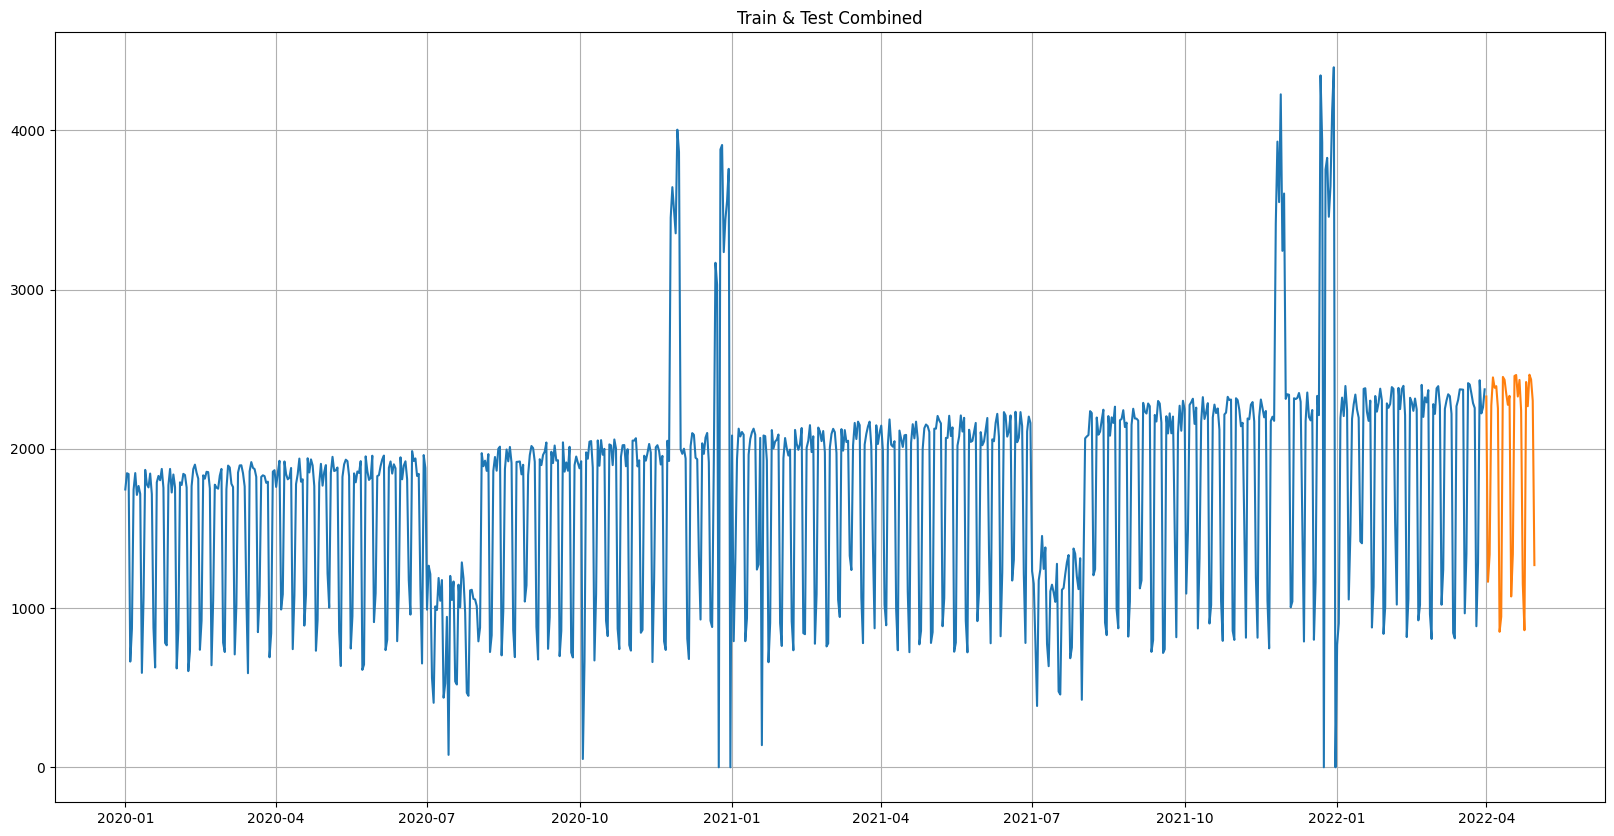

In [10]:
plt.plot(df_train['ds'],df_train['y'], label='Normal')
plt.plot(df_test['ds'],df_test['y'], label='Normal')
plt.title("Train & Test Combined")
plt.grid()
plt.show()

Prognose for the training data

21:54:24 - cmdstanpy - INFO - Chain [1] start processing
21:54:24 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/c8/8zl_55w17yj1dxzz8l6ph5_c0000gp/T/ipykernel_43417/2761089623.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


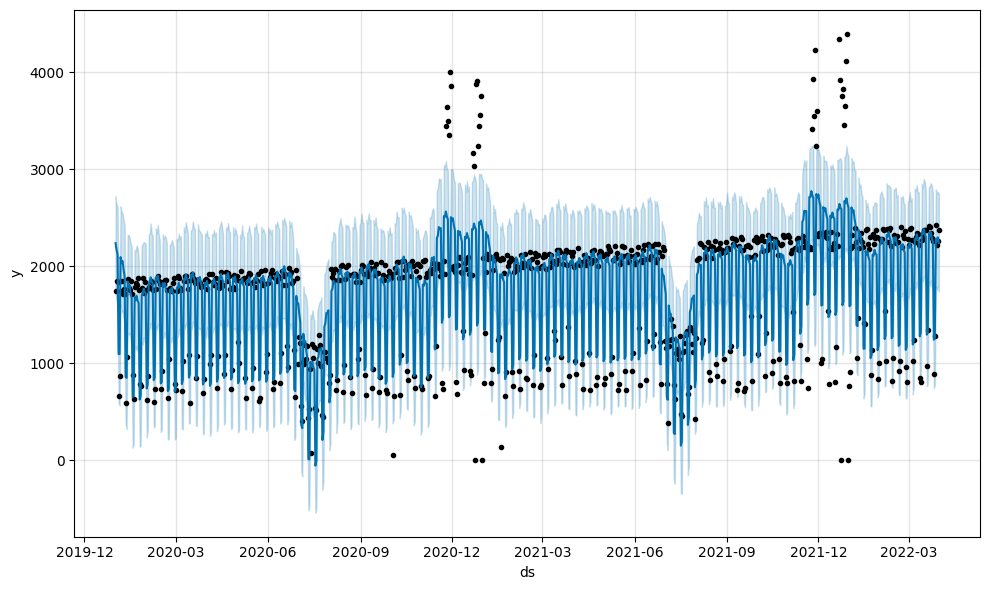

In [11]:
model = Prophet()
model.fit(df_train)
forecast_train = model.predict(df_train)

fig = model.plot(forecast_train)
fig.show()

What I observe in the forecasting is that the algorithm's dark blue lines don't capture the positive extreme values of the black data points in November and December. However, it does manage to identify the extreme values moving in a negative direction (the month of July). I would guess this is because during the month of July, the number of packages drops significantly throughout the entire month, whereas the spikes I have at the end of November and December only occur over a few days. This is why the algorithm has an easier time capturing July than November and December. I also observe that yhat upper is generally smoother than yhat lower, which should be due to there being more negative spikes in the dataset than positive ones. But based on the dark blue line, I think both follow at a steady distance despite the spikes. And since it doesn't contain any future prediction, it remains consistent throughout the entire forecast.

/var/folders/c8/8zl_55w17yj1dxzz8l6ph5_c0000gp/T/ipykernel_43417/3438844716.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


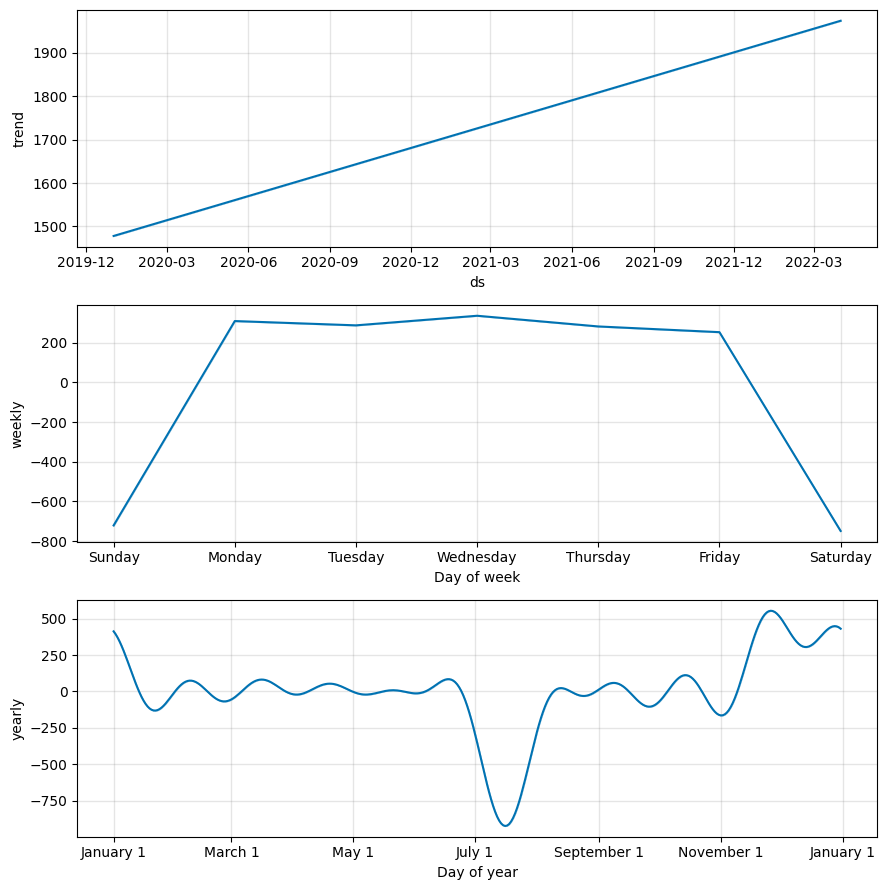

In [12]:
fig = model.plot_components(forecast_train)
fig.show()

I see that the plot shows a positive trend that increases by roughly 200 packages annually. Then, I notice it has an annual seasonal variation with a dip in July and spikes at the end of November and December. There's also a weekly seasonal variation where the number of packages decreases on Saturdays and Sundays.

In [13]:
forecast_test = model.predict(df_test)

In [14]:

# Actual test data
y_true = df_test['y'].values
y_true_mean = y_true.mean()

y_pred = forecast_test['yhat'].values

# Performance
mae = mean_absolute_error(y_true, y_pred)
print(f"Amount of error between actual data and prediction: {mae}")

Amount of error between actual data and prediction: 117.46651842909269


In [15]:
# Planned data 
y_planned = planning['y'].values

mae_planned = mean_absolute_error(y_true,y_planned)
print(f"Amount of errors compared between actual data and planned: {mae_planned}")

Amount of errors compared between actual data and planned: 524.9666666666667


In [16]:
mae_y_pred_planned = mean_absolute_error(y_planned,y_pred)
print(f"Amount of errors compared between predicted and planned: {mae_y_pred_planned}")

Amount of errors compared between predicted and planned: 428.423128026801


In [17]:
print(f"Mean value of all data to put it in context: {y_true_mean}")

Mean value of all data to put it in context: 1991.1666666666667


After comparing my prediction with the actual test data, I get an MAE (Mean Absolute Error) value of about 117, which I feel is quite okay since the error is less than 10% of the average of all y-values. However, one can see that the planning has more than four times as much error as the results from the algorithm. So, perhaps the company should rely more on the algorithm's results.
___

Declares a future datafram that includes a prognose for June.

In [18]:
future = model.make_future_dataframe(periods=91)

In [19]:
forecast_june = model.predict(future)

It appears to follow the previous pattern both in the plot and in the components.

/var/folders/c8/8zl_55w17yj1dxzz8l6ph5_c0000gp/T/ipykernel_43417/1185806537.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


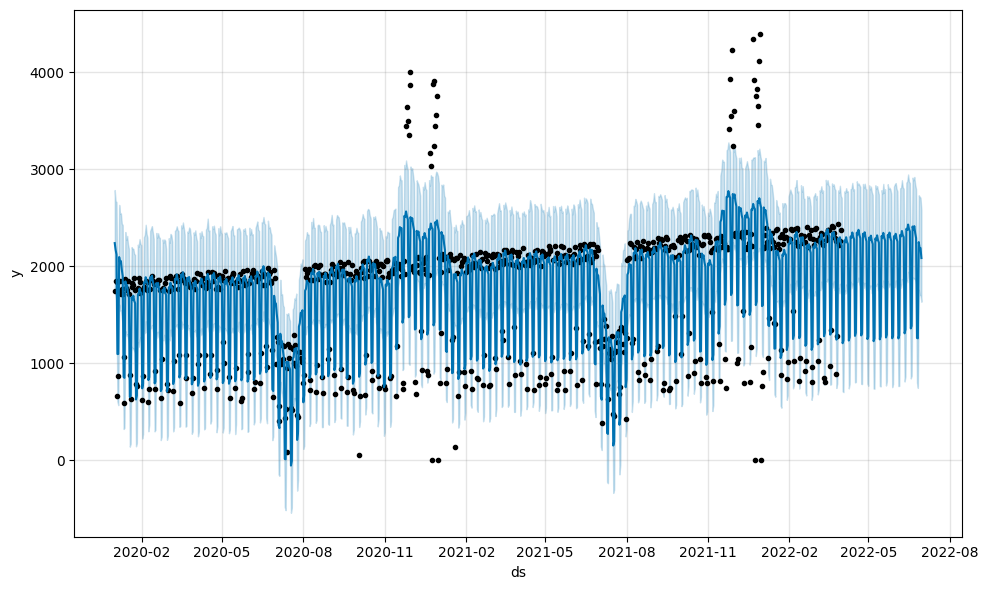

In [20]:
fig = model.plot(forecast_june)
fig.show()

/var/folders/c8/8zl_55w17yj1dxzz8l6ph5_c0000gp/T/ipykernel_43417/3081589854.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


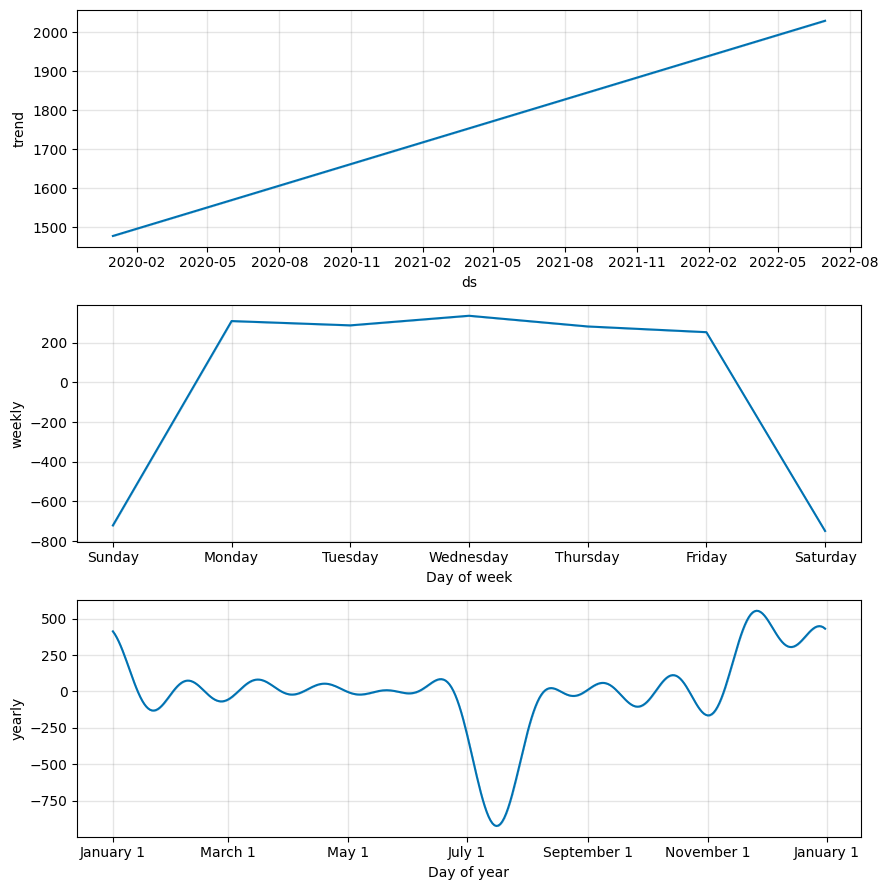

In [21]:
fig = model.plot_components(forecast_june)
fig.show()